In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
filepath = r'.\data\housing.csv'
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv(filepath, sep = '\s+', header = None, names = column_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
df = df[~(df['MEDV'] >= 50.0)].reset_index(drop = True)

In [4]:
X = df[['RM', 'PTRATIO', 'TAX', 'LSTAT']]
y = df['MEDV']

In [5]:
def mae_val(y, y_pred):
    return np.mean(abs(y - y_pred))
def mse_val(y, y_pred):
    return np.mean(np.square(np.subtract(y, y_pred)))
def r_square(y, y_pred):
    ssr = np.sum(np.square(np.subtract(y, y_pred)))
    sst = np.sum(np.square(np.subtract(y, np.mean(y))))
    return 1 - ssr/sst

def performance_evaluation(y, y_pred):
    mae = mae_val(y, y_pred)
    mse = mse_val(y, y_pred)
    r2 = r_square(y, y_pred)
    
    print(f'Mean absolute error is {mae:.4f}')
    print(f'MSE (test): {mse:.4f}')
    print(f'RMSE (test): {mse**0.5:.4f}')
    print(f'R-squared is {r2:.4f}')

In [6]:
def train_test(X, y, train_size = 0.8, seed = None):

    if seed is not None:
        np.random.seed(seed)

    num_samples = len(X)
    print(num_samples)
    index = np.arange(num_samples)
    np.random.shuffle(index)

    X = X.loc[index]
    y = y.loc[index]

    split_i = int(num_samples * train_size)
    X_train, X_test = X[:split_i], X[split_i:]
    y_train, y_test = y[:split_i], y[split_i:]

    return X_train, X_test, y_train, y_test

In [7]:
import itertools
from gradient_boosting_tree.gradient_boosting import GradientBoostingRegressor

def grid_search(parameters, X_train, X_test, y_train, y_test):
    best_r2 = 0

    param_combinations = list(itertools.product(*parameters.values()))

    for combo in param_combinations:
        model = GradientBoostingRegressor(**dict(zip(parameters.keys(), combo)))
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r_square(y_test, y_pred)
        if r2 > best_r2:
            best_r2 = r2
            best_combo = combo
            best_y_pred = y_pred

    return best_r2, best_combo, best_y_pred


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

c:\Users\AyaZeplovitch\OneDrive - Kubrick Group\Desktop\JPM\jpm_project\venv\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\AyaZeplovitch\OneDrive - Kubrick Group\Desktop\JPM\jpm_project\venv\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Best Score (R2): 0.8454061559038469
Best parameters: (3, 4, 0.1, 50)


[]

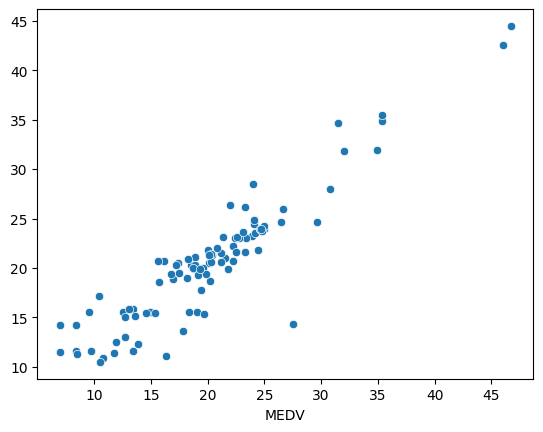

In [9]:
parameters = {'max_depth': [2, 3, 4],
              'min_samples': [4, 5, 6],
              'learning_rate': [0.05, 0.1, 0.2],
              'n_estimators': [25, 50, 75]} 

best_r2, best_params, y_pred = grid_search(parameters, X_train, X_test, y_train, y_test)
print(f"Best Score (R2): {best_r2}")
print("Best parameters:", best_params)

sns.scatterplot(x = y_test, y = y_pred)
plt.plot()

In [10]:
from gradient_boosting_tree.utils import performance_evaluation
performance_evaluation(y_test, y_pred)

Mean absolute error is 1.9884
MSE (test): 7.8975
RMSE (test): 2.8102
R-squared is 0.8454
